# Projet d'Analyse de Données 2021/2022


## Import Libraries

** Import the libraries you usually use for data analysis.**

In [1]:
import os
from sklearn.metrics import silhouette_samples, silhouette_score # basic ML models
import pandas as pd # data frame
import numpy as np # manipulate N-dimensional arrays
import matplotlib.pyplot as plt # data plotting
import seaborn as sns # data visualization 
import scipy # scientific computing library
%matplotlib inline

## Get the Data

** Read in the "chronic_kidney_disease" file using read_csv.**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Choisir le dossier dans lequel se trouvent vos données
os.chdir('/content/drive/MyDrive/Projet-analyse-de-donne')

Mounted at /content/drive


In [3]:

df = pd.read_csv('./ObesityDataSet_raw_and_data_sinthetic.csv', header=0)

**Check the head of the data**

In [4]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


** Check the info() and describe() methods on the data.**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


<font color='blue'>Les informations importantes que l'on peut noter sont:
* Nos données sont composées de 2111 individus (lignes) et 17 attributs (colonnes). 16 attributs sont descriptifs, et un attribut (NObeyesdad) donne la classification des individus. La classe n'est pas utile dans un algorithme de clustering (non-supervisé), mais elle nous servira pour évaluer nos prédictions.
* Aucune cellules de la DataFrame comportent des "NaN": nous n'avons pas des données manquantes, qu'il va falloir remplacer.
* Certains attributs sont numériques (chiffres), tandis que les autres sont catégoriques (lettres). Il va falloir retraiter les données catégoriques avant qu'elles puissent être données en entrée d'un algorithme.
*</font>

## Data Preparation

In [8]:
# Separate the labels from the variables
data = df.drop("NObeyesdad", axis =1)
labels = df["NObeyesdad"]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [10]:
# Séparer les attributs sont numériques (chiffres) et ceux  catégoriques (lettres)
#Nominal attributes:"Age","Height","Weight","FCVC","NCP","CH2O", "FAF", "TUE"
#categorical attributes:"Gender","family_history_with_overweight","FAVC","CAEC","SMOKE","SCC", "CALC", "MTRANS"
data_num = data[["Age","Height","Weight","FCVC","NCP","CH2O", "FAF", "TUE"]]
data_cat = data[["Gender","family_history_with_overweight","FAVC","CAEC","SMOKE","SCC", "CALC", "MTRANS"]]

In [11]:
print(data_num)
print(data_cat)

            Age    Height      Weight  FCVC  NCP      CH2O       FAF       TUE
0     21.000000  1.620000   64.000000   2.0  3.0  2.000000  0.000000  1.000000
1     21.000000  1.520000   56.000000   3.0  3.0  3.000000  3.000000  0.000000
2     23.000000  1.800000   77.000000   2.0  3.0  2.000000  2.000000  1.000000
3     27.000000  1.800000   87.000000   3.0  3.0  2.000000  2.000000  0.000000
4     22.000000  1.780000   89.800000   2.0  1.0  2.000000  0.000000  0.000000
...         ...       ...         ...   ...  ...       ...       ...       ...
2106  20.976842  1.710730  131.408528   3.0  3.0  1.728139  1.676269  0.906247
2107  21.982942  1.748584  133.742943   3.0  3.0  2.005130  1.341390  0.599270
2108  22.524036  1.752206  133.689352   3.0  3.0  2.054193  1.414209  0.646288
2109  24.361936  1.739450  133.346641   3.0  3.0  2.852339  1.139107  0.586035
2110  23.664709  1.738836  133.472641   3.0  3.0  2.863513  1.026452  0.714137

[2111 rows x 8 columns]
      Gender family_history

In [12]:
data_num.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Handling categorical attributes

In [13]:
#View list of Variables
for x in data_cat.columns:
   print(x, end=" ") ; print( data_cat[x].unique())

Gender ['Female' 'Male']
family_history_with_overweight ['yes' 'no']
FAVC ['no' 'yes']
CAEC ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE ['no' 'yes']
SCC ['no' 'yes']
CALC ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


In [14]:
#Use the pandas functions : factorize(),
data_cat_encoded = []
data_categories = []

# factorize prend en entrée une liste: on doit donc faire une boucle pour 
# traiter individuellement chacune des colonnes catégoriques
for x in data_cat:
    data_cat_encod, data_categ = pd.factorize(data_cat[x])
    data_cat_encoded.append(data_cat_encod)
    data_categories.append(data_categ)
#print(data_cat_encoded)
#print(data_categories)

data_cat_encoded = pd.DataFrame(np.transpose(data_cat_encoded), columns=["Gender","family_history_with_overweight","FAVC","CAEC","SMOKE","SCC", "CALC", "MTRANS"])
data_cat_encoded.describe()


,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,0.182378,0.883941,0.237328,0.020843,0.045476,0.731407,0.488394
std,0.500083,0.386247,0.320371,0.613474,0.142893,0.208395,0.515498,0.868475
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,3.000000,4.000000


In [15]:
data_cat_encoded.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,0
2,1,0,0,0,0,0,2,0
3,1,1,0,0,0,0,2,1
4,1,1,0,0,0,0,1,0


In [16]:
# Merge the numerical and categorical datasets

data_tr = pd.concat([data_num, data_cat_encoded], axis=1)
data_tr.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,0.505921,0.182378,0.883941,0.237328,0.020843,0.045476,0.731407,0.488394
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,0.500083,0.386247,0.320371,0.613474,0.142893,0.208395,0.515498,0.868475
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,3.000000,4.000000


In [17]:
print(data_tr.shape)
# la taille de data_tr est bien identique à celle de data

(2111, 16)


Save the obtained dataset in a new file so that it can be easier to reuse later on.

In [18]:
data_tr.to_csv("./data_tr.csv")

## Data Visualization

It's time to create some data visualizations!


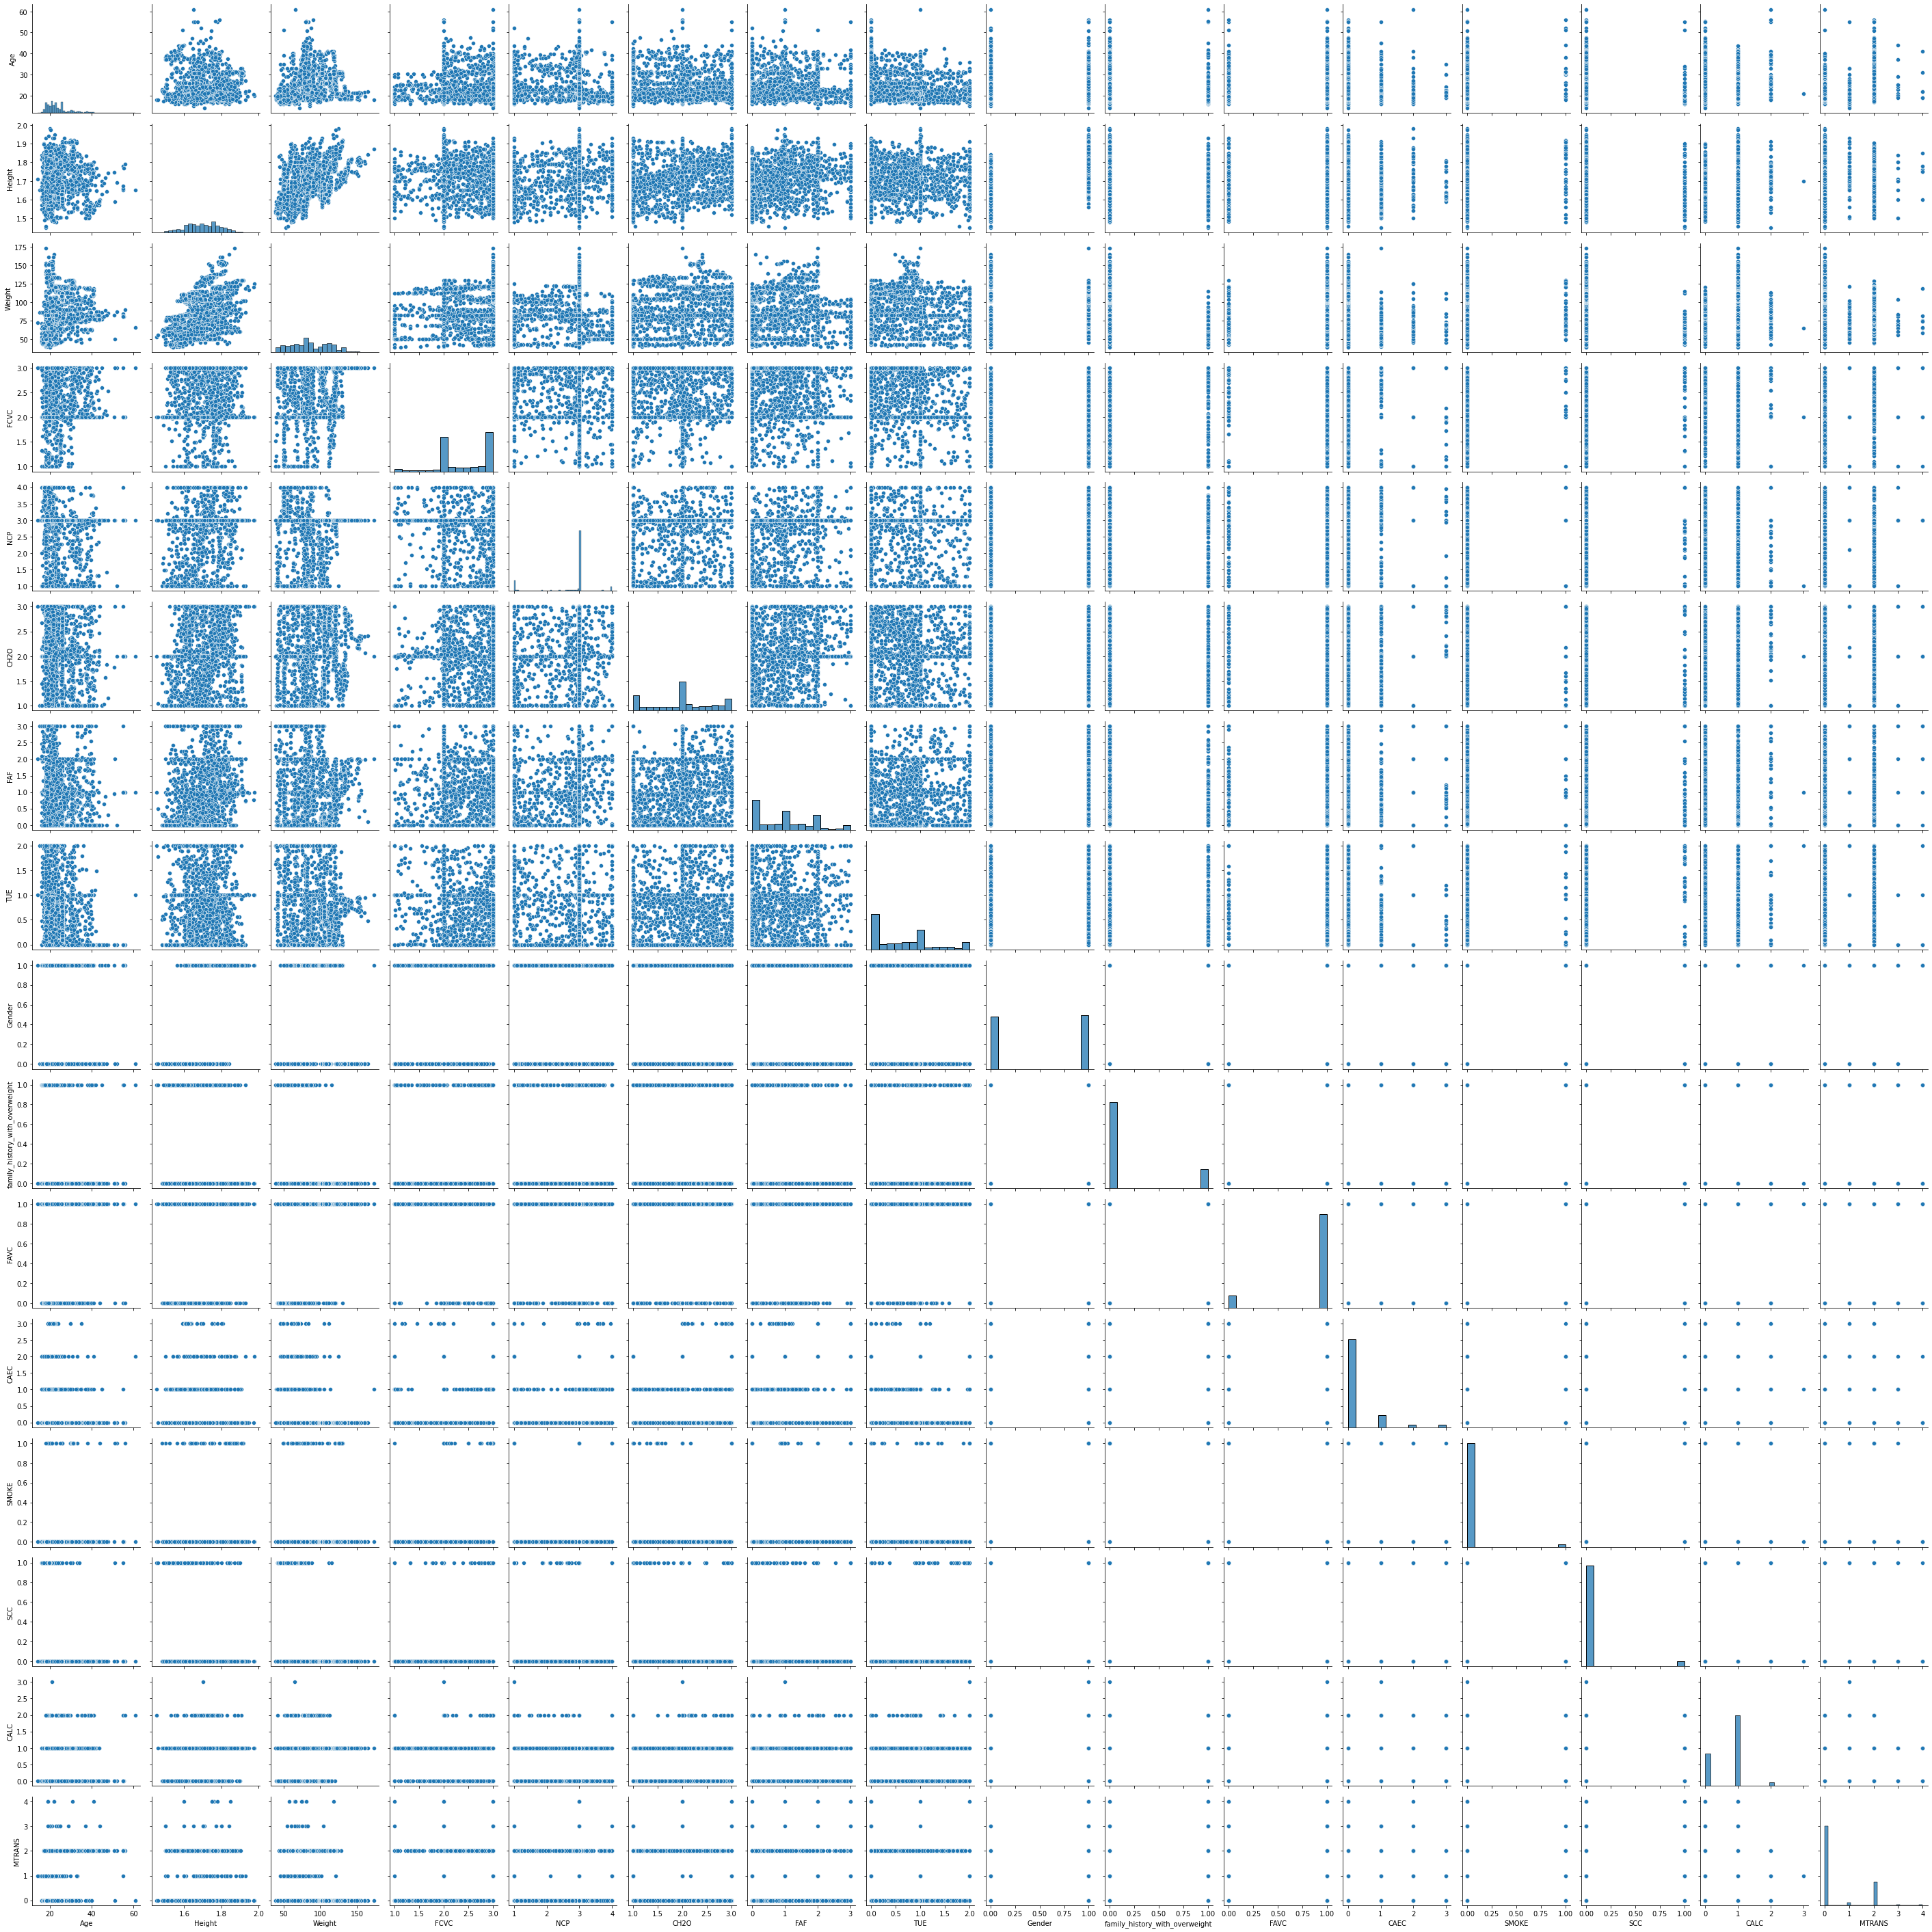

In [19]:
sns.pairplot(data_tr)

## Data Normalization
Scale the data so that each feature has a single unit variance and zero mean

In [20]:
# Import the library
from sklearn.preprocessing import StandardScaler

# Use StandardScaler
scaler = StandardScaler()
scaler.fit(data_tr)
scaled_data = scaler.transform(data_tr)

In [21]:
pd.DataFrame(scaled_data, columns=data_tr.columns)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,-1.011914,-0.472291,-2.759769,-0.386951,-0.145900,-0.218272,-1.419172,-0.562491
1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,-1.011914,-0.472291,-2.759769,-0.386951,6.853997,4.581439,0.521160,-0.562491
2,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,0.988227,-0.472291,-2.759769,-0.386951,-0.145900,-0.218272,2.461491,-0.562491
3,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,0.988227,2.117337,-2.759769,-0.386951,-0.145900,-0.218272,2.461491,0.589225
4,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,0.988227,2.117337,-2.759769,-0.386951,-0.145900,-0.218272,0.521160,-0.562491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,-0.525774,0.097045,1.711763,1.088342,0.404153,-0.456705,0.783135,0.407996,-1.011914,-0.472291,0.362349,-0.386951,-0.145900,-0.218272,0.521160,-0.562491
2107,-0.367195,0.502844,1.800914,1.088342,0.404153,-0.004702,0.389341,-0.096251,-1.011914,-0.472291,0.362349,-0.386951,-0.145900,-0.218272,0.521160,-0.562491
2108,-0.281909,0.541672,1.798868,1.088342,0.404153,0.075361,0.474971,-0.019018,-1.011914,-0.472291,0.362349,-0.386951,-0.145900,-0.218272,0.521160,-0.562491
2109,0.007776,0.404927,1.785780,1.088342,0.404153,1.377801,0.151471,-0.117991,-1.011914,-0.472291,0.362349,-0.386951,-0.145900,-0.218272,0.521160,-0.562491


## Réduction de dimension 


### 1.Réaliser une analyse en composantes principales sur les données.

In [22]:
# Import the library
from sklearn.decomposition import PCA

# Use PCA
pca = PCA()
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [23]:
scaled_data.shape

(2111, 16)

In [24]:
x_pca.shape

(2111, 16)

### 2.Visualiser les individus et les variables 

#### Give the coordinates of the individuals according to the first 2 axis (1er et 2nd axes factoriels)

In [25]:
print(x_pca[:,0])
print(x_pca[:,1])

[ 1.85996908  2.54229655 -0.53119308 ... -1.2599366  -1.46042283
 -1.42792456]
[ 0.12735463 -0.9255867  -1.79161054 ... -0.03244721  0.03614724
 -0.03610827]


In [26]:
x_pca[:,0].shape

(2111,)

#### Project the data (1er et 2nd axes factoriels) with the classes

In [27]:
labels.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [28]:
labels_num, labels_cat = pd.factorize(labels)

In [29]:
labels_cat

Index(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'],
      dtype='object')

In [30]:
labels_num

array([0, 0, 0, ..., 6, 6, 6])

In [31]:
labels

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object

Text(0, 0.5, 'Second Principal Component')

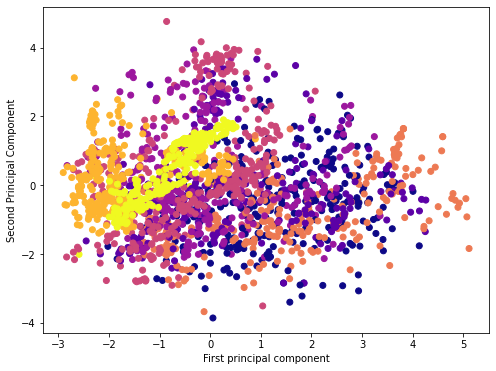

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=labels_num,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

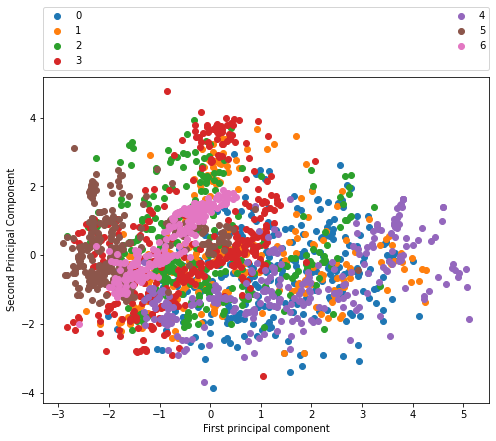

In [33]:
plt.figure(figsize=(8,6))
for label in np.unique(labels_num):
    plt.scatter(x_pca[labels_num==label, 0], x_pca[labels_num==label, 1],cmap='plasma', label=label)
# plt.scatter(x_pca[:,0],x_pca[:,1],c=clabels,cmap='plasma',label=clabels)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=2)

#### <u> Conclusion : </u> 
On peut constater que dans ce nouvel espace réduit que les individus issus de la classe "Obesity_Type_III" (id: 6) sont regroupés. On peut en dire qu'à priori les valeurs prises par les variables d'origine sont différentes entre les 7 classes, à l'origine d'une variabilité au sein des variables. L'ACP a tenu en compte de cette information.

#### Give the 2 first components coordinates

In [34]:
print(pca.components_[0,:])
print(pca.components_[1,:])

[-0.2006053  -0.45162892 -0.4725961  -0.02029467 -0.15815952 -0.17578148
 -0.06408039  0.02124433 -0.31085756  0.392532   -0.24877624  0.27162129
 -0.031129    0.22547021 -0.11579399 -0.1412908 ]
[ 0.52265183 -0.33719172  0.07352099  0.12797608 -0.17629282 -0.22212584
 -0.40194099 -0.31644988 -0.29218835 -0.13693862  0.07407116 -0.16269578
  0.01307155 -0.10264073  0.01550077  0.31970068]


#### Plot the explained variance of each component

In [35]:
x_pca.shape

(2111, 16)

In [36]:
n=x_pca.shape[0]
# Explained variance
print(pca.explained_variance_)

# Corrected variance values
corrected_variance = ((n-1)/n)*pca.explained_variance_
print(corrected_variance)

[2.63032211 1.82437664 1.6139401  1.36048872 1.13724749 1.04166357
 0.9714208  0.85967065 0.82227624 0.79517378 0.75319251 0.65103119
 0.57467228 0.40998118 0.33092728 0.23119841]
[2.6290761  1.82351241 1.61317556 1.35984424 1.13670877 1.04117013
 0.97096063 0.85926342 0.82188672 0.79479709 0.75283571 0.65072279
 0.57440005 0.40978696 0.33077052 0.23108889]


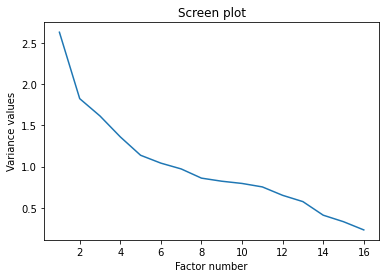

In [37]:
#Plot
p=x_pca.shape[1]
plt.plot(np.arange(1,p+1),corrected_variance)
plt.title("Screen plot")
plt.ylabel("Variance values")
plt.xlabel("Factor number")
plt.show()

#### Plot the explained cumulative variance of each component in percentage

In [38]:
pca.explained_variance_ratio_*100

array([16.43172561, 11.39695258, 10.08234725,  8.49902653,  7.1044298 ,
        6.50731331,  6.06850392,  5.37039636,  5.13679201,  4.96748184,
        4.70522319,  4.06701742,  3.59000032,  2.56116852,  2.06731575,
        1.44430558])

In [39]:
cumulative_var = np.cumsum(pca.explained_variance_ratio_*100)
cumulative_var

array([ 16.43172561,  27.82867819,  37.91102544,  46.41005197,
        53.51448177,  60.02179507,  66.090299  ,  71.46069536,
        76.59748737,  81.56496921,  86.2701924 ,  90.33720982,
        93.92721015,  96.48837867,  98.55569442, 100.        ])

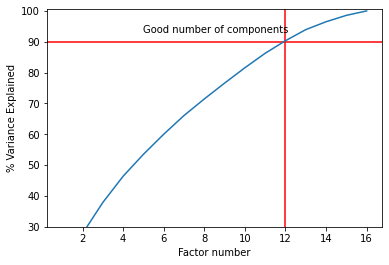

In [40]:
# plot the explained variance of each component
plt.ylabel('% Variance Explained')
plt.xlabel('Factor number')
plt.axvline(x=12,color='red')
plt.axhline(y=90, color='red', linestyle='-')
plt.text(5, 93, "Good number of components")
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(np.arange(1,p+1),cumulative_var)

#### <u> Conclusion : </u>
Du premier graphique, on voit que le premier facteur retient une grande partie de la variabilité des données. La variabilité retenue par les facteurs suivants est décroissante.  
Du second graphique, on peut noter qu'en retenant seulement 2 facteurs, presque 40% des données sont expliquées.
Un nombre de facteurs égal à 12# permet d'expliquer 90% des données. Cela semble être un bon compromis. 

#### Compute the correlation between the principal components and the variables

In [41]:
# Compute the correlation of the variables with the principal axes
sqrt_cor_var = np.sqrt(corrected_variance)
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_cor_var[k]

# Print the correlation matrix "variables x factors"
print(corvar.shape)
corvar

(16, 16)


array([[-3.25269984e-01,  7.05775921e-01,  4.15155051e-01,
         7.76047627e-02, -1.14421422e-02,  1.11358874e-02,
         4.21124636e-02,  1.25216587e-01, -6.23913812e-02,
        -8.65783785e-02, -3.76650394e-02,  4.43443161e-02,
         6.01961465e-02,  2.93055169e-01,  2.68685860e-01,
        -1.53379968e-01],
       [-7.32290364e-01, -4.55335243e-01,  1.95230521e-01,
         4.54946687e-02,  7.80251451e-02,  7.53642382e-03,
        -3.24173020e-02, -1.34244836e-01,  1.71981300e-01,
         1.44420517e-02, -1.77604746e-03,  1.38163827e-01,
        -4.20014963e-02,  3.23177683e-03, -1.88581966e-01,
        -3.23731948e-01],
       [-7.66287448e-01,  9.92809004e-02, -3.24985410e-01,
         1.95830759e-01,  5.12476428e-02, -4.29296363e-02,
         8.51663780e-02, -9.24077436e-02,  9.18461788e-02,
         1.14580428e-01,  1.92588526e-02,  7.57468661e-02,
         8.86363042e-02,  3.48987386e-01, -1.81858540e-01,
         2.19831448e-01],
       [-3.29066487e-02,  1.72815692e

#### Compute the correlation circle between the two first principal components and the variables

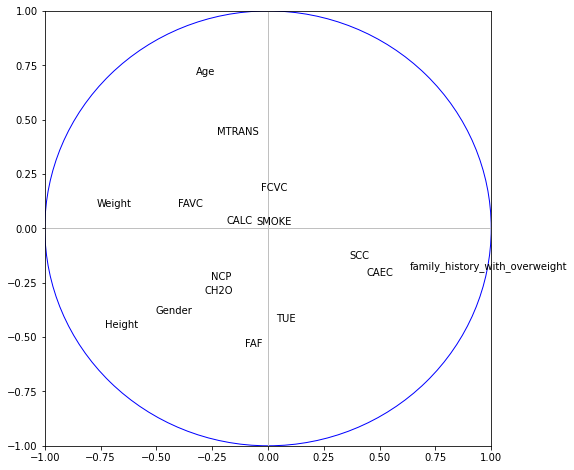

In [42]:
# Correlation circle
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
# Print the labels (variable names)
for j in range(p):
     plt.annotate(data_tr.columns[j],(corvar[j,0],corvar[j,1]))

# Add the axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# Add a circle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
# Print the correlation circle
plt.show()

## Clustering 

### 1.Appliquer l'algorithmes de k-means sur les données. Utiliser la mesure « Silhouette » pour choisir le nombre de clusters. Visualiser les clusters sur le plan obtenu par l'ACP

#### Number of clusters

In [43]:
X = data_tr.to_numpy()

In [44]:
X.shape

(2111, 16)

For n_clusters = 2 The average silhouette_score is : 0.568476900266279
For n_clusters = 3 The average silhouette_score is : 0.5018247303858768
For n_clusters = 4 The average silhouette_score is : 0.476654697519365
For n_clusters = 5 The average silhouette_score is : 0.43497018384697417
For n_clusters = 6 The average silhouette_score is : 0.4562930057748685


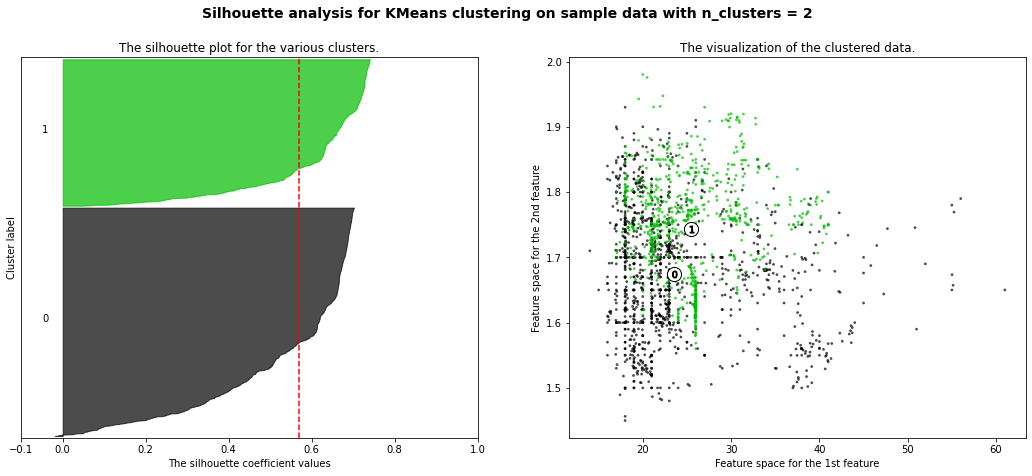

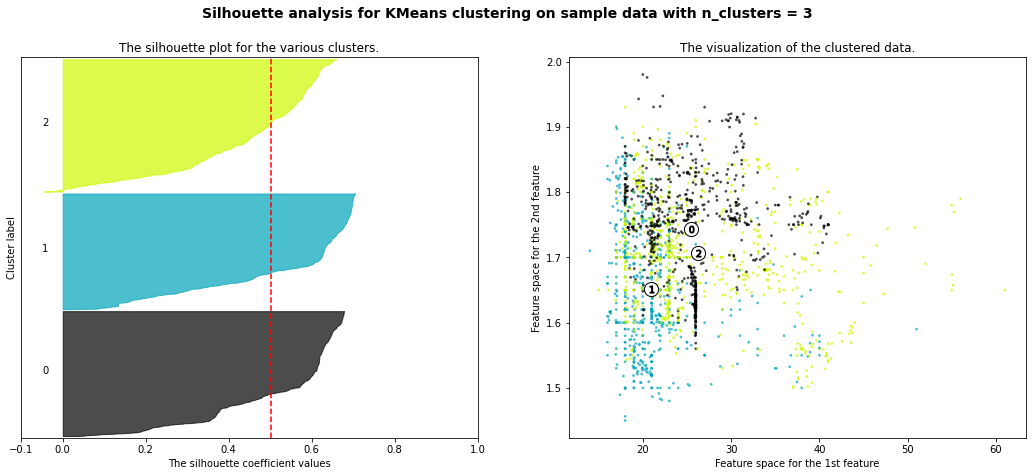

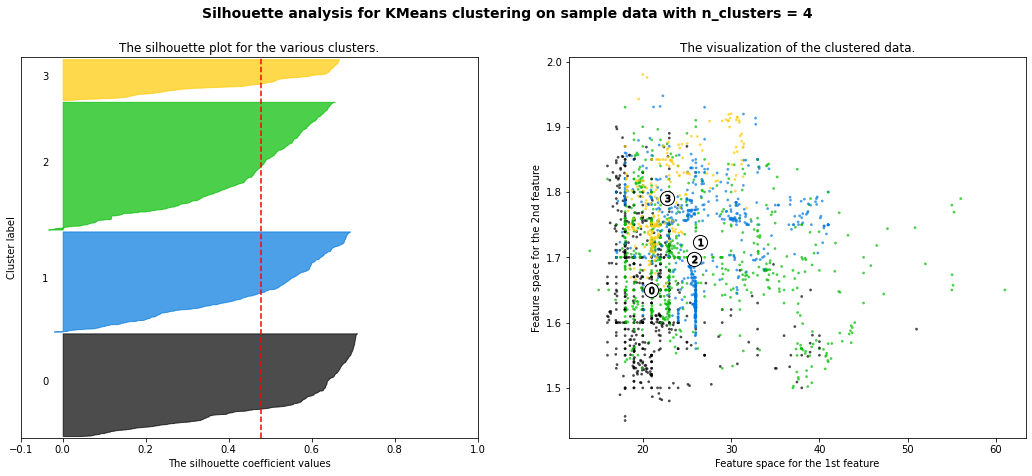

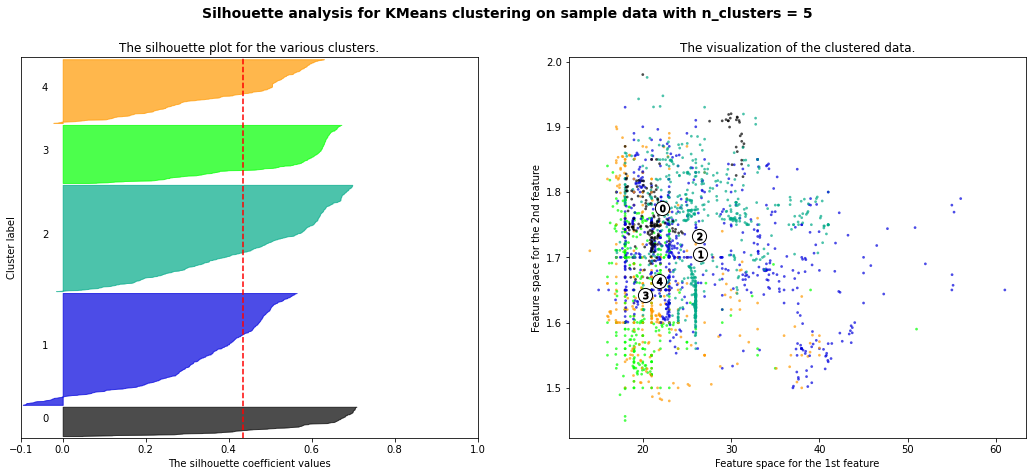

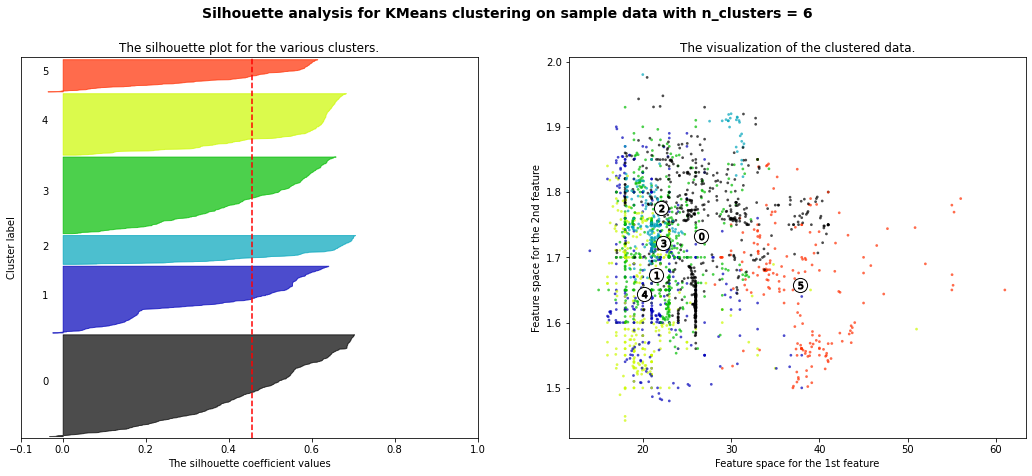

In [45]:
# Use the silhouette function to find the number of clusters fo both k-means and hierarchical clustering
range_n_clusters = range(2,7)

# Kmeans

# Import KMeans from SciKit Learn
from sklearn.cluster import KMeans
import matplotlib.cm as cm

#
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


#### K Means Cluster Creation


In [46]:
kmeans = KMeans(n_clusters=2)

In [47]:
kmeans.fit(scaled_data)

KMeans(n_clusters=2)

In [48]:
kmeans.cluster_centers_

array([[-0.51116548, -0.65904814, -1.04765749, -0.11056835, -0.1330027 ,
        -0.28064429,  0.11108547,  0.08595594, -0.41965558,  1.08762028,
        -0.68892255,  0.79933048,  0.07913872,  0.51264843, -0.1748645 ,
        -0.29940905],
       [ 0.19874921,  0.25624832,  0.40734577,  0.04299072,  0.05171355,
         0.10911893, -0.04319178, -0.03342103,  0.16316871, -0.42288394,
         0.26786397, -0.31079231, -0.03077038, -0.1993258 ,  0.06799008,
         0.11641497]])

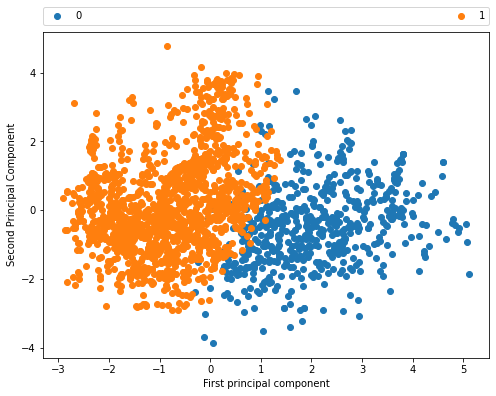

In [49]:
plt.figure(figsize=(8,6))
for label in np.unique(kmeans.labels_):
    plt.scatter(x_pca[kmeans.labels_==label, 0], x_pca[kmeans.labels_==label, 1],cmap='plasma', label=label)
# plt.scatter(x_pca[:,0],x_pca[:,1],c=clabels,cmap='plasma',label=clabels)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=2)

### 2.Appliquer le k-means sur les données représentées dans le nouvel espace obtenu par l'ACP. Visualiser les données. 

#### K Means Cluster Creation


In [50]:
kmeans3 = KMeans(n_clusters=2)

In [51]:
kmeans3.fit(x_pca[:, 0:2])

KMeans(n_clusters=2)

In [52]:
kmeans3.cluster_centers_

array([[ 1.99284935, -0.37033033],
       [-0.88465063,  0.16439424]])

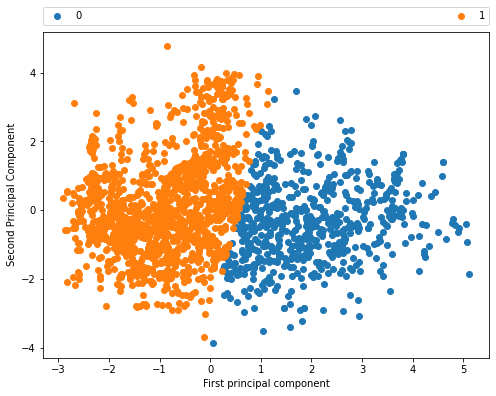

In [53]:
plt.figure(figsize=(8,6))
for label in np.unique(kmeans3.labels_):
    plt.scatter(x_pca[kmeans3.labels_==label, 0], x_pca[kmeans3.labels_==label, 1],cmap='plasma', label=label)
# plt.scatter(x_pca[:,0],x_pca[:,1],c=clabels,cmap='plasma',label=clabels)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=2)

### 3.Comparer les deux résultats obtenus.

## Analyse des corrélations canoniques

### 1.Réaliser une analyse des corrélations canonique

In [54]:
n= data_tr.shape[0] # nombre d'individue
d=  data_tr.shape[1] # nombre de colonnes/variables (p+q)
print(n)
print(d)

2111
16


In [55]:
#Separate the tree groups of variables
#X : The variables related with eating habits are "FAVC", "FCVC", "NCP", "CAEC", "CH20", "CALC", "SMOKE". 
#Y : The variables related with the physical condition are "SCC", "FAF", "TUE", "MTRANS",.
#Z :  The variables related with the persone are "Gender", "Age", "Height", "Weight", "family_history_with_overweight".
X2 = data_tr[["FAVC", "FCVC", "NCP", "CAEC", "CH2O", "CALC", "SMOKE"]]
Y2 = data_tr[["SCC", "FAF", "TUE", "MTRANS"]]
Z2 = data_tr[["Gender", "Age", "Height", "Weight", "family_history_with_overweight"]]

In [56]:
print(X2.head())
print(Y2.head())
print(Z2.head())

   FAVC  FCVC  NCP  CAEC  CH2O  CALC  SMOKE
0     0   2.0  3.0     0   2.0     0      0
1     0   3.0  3.0     0   3.0     1      1
2     0   2.0  3.0     0   2.0     2      0
3     0   3.0  3.0     0   2.0     2      0
4     0   2.0  1.0     0   2.0     1      0
   SCC  FAF  TUE  MTRANS
0    0  0.0  1.0       0
1    1  3.0  0.0       0
2    0  2.0  1.0       0
3    0  2.0  0.0       1
4    0  0.0  0.0       0
   Gender   Age  Height  Weight  family_history_with_overweight
0       0  21.0    1.62    64.0                               0
1       0  21.0    1.52    56.0                               0
2       1  23.0    1.80    77.0                               0
3       1  27.0    1.80    87.0                               1
4       1  22.0    1.78    89.8                               1


In [57]:
#1st step: determination of the two groups p=6 and q=4
# Ne pas prendre les 3ères colonnes puis les 3 prochaines! cf: énoncé
p=X2.shape[1]
print("p:",p)
print("n:",X2.shape[0])
print(n==X2.shape[0])

q=Y2.shape[1]
print("q:",q)
print("n:",Y2.shape[0])
print(n==Y2.shape[0])

p: 7
n: 2111
True
q: 4
n: 2111
True


In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X2)
X2 = scaler.transform(X2)

scaler.fit(Y2)
Y2 = scaler.transform(Y2)


scaler.fit(Z2)
Z2 = scaler.transform(Z2)

In [59]:
from sklearn.cross_decomposition import CCA

cca = CCA(n_components=2) 
cca.fit(X2, Y2)
U_, V_ = cca.transform(X2, Y2)
corr_cca2 = pd.DataFrame(np.corrcoef(U_.T, V_.T),index=["$U_1$","$U_2$","$V_1$","$V_2$"],columns=["$U_1$","$U_2$","$V_1$","$V_2$"])
corr_cca2.style.background_gradient(cmap='coolwarm') 

,$U_1$,$U_2$,$V_1$,$V_2$
$U_1$,1.000000,0.000000,0.304445,0.000000
$U_2$,0.000000,1.000000,-0.000117,0.242104
$V_1$,0.304445,-0.000117,1.000000,-0.000000
$V_2$,0.000000,0.242104,-0.000000,1.000000


### 2.Visualiser les variables et les individus

In [60]:
# en utilisant sklearn, vous devez quand même calculer les matrices centrée-réduites pour tracer le cercle de corrélation
datacon=pd.DataFrame(np.concatenate((X2,Y2),axis=1),columns=["FAVC", "FCVC", "NCP", "CAEC", "CH2O", "CALC", "SMOKE", "SCC", "FAF", "TUE", "MTRANS"])
datacon.head()

,FAVC,FCVC,NCP,CAEC,CH2O,CALC,SMOKE,SCC,FAF,TUE,MTRANS
0,-2.759769,-0.785019,0.404153,-0.386951,-0.013073,-1.419172,-0.145900,-0.218272,-1.188039,0.561997,-0.562491
1,-2.759769,1.088342,0.404153,-0.386951,1.618759,0.521160,6.853997,4.581439,2.339750,-1.080625,-0.562491
2,-2.759769,-0.785019,0.404153,-0.386951,-0.013073,2.461491,-0.145900,-0.218272,1.163820,0.561997,-0.562491
3,-2.759769,1.088342,0.404153,-0.386951,-0.013073,2.461491,-0.145900,-0.218272,1.163820,-1.080625,0.589225
4,-2.759769,-0.785019,-2.167023,-0.386951,-0.013073,0.521160,-0.145900,-0.218272,-1.188039,-1.080625,-0.562491


In [61]:
# Calcul C1 et C2
C1 = np.array((1/2)*(U_[:,0]+V_[:,0])) #avec sklearn, sinon utiliser U et V directement
print("Dim C1: ", C1.shape)
C2 = np.array((1/2)*(U_[:,1]+V_[:,1]))
print("Dim C2: ",C2.shape)
Caxes =  np.array([C1,C2])
print(Caxes.shape)

Dim C1:  (2111,)
Dim C2:  (2111,)
(2, 2111)


In [62]:
# Calcul la  pour obtenir leurs coordonnées
corvar2 = np.corrcoef(Caxes, datacon.T) #use the scaled data

In [63]:
#X : The variables related with eating habits are "FAVC", "FCVC", "NCP", "CAEC", "CH20", "CALC", "SMOKE". 
#Y : The variables related with the physical condition are "SCC", "FAF", "TUE", "MTRANS",.

In [64]:
pd.DataFrame(corvar2, columns=['C1', 'C2', 'X1', 'X2', 'X3','X4', 'X5', 'X6','X7', 'Y1', 'Y2', 'Y3','Y4'], index=['C1', 'C2', 'X1', 'X2', 'X3','X4', 'X5', 'X6','X7', 'Y1', 'Y2', 'Y3','Y4']).style.background_gradient(cmap='coolwarm')

,C1,C2,X1,X2,X3,X4,X5,X6,X7,Y1,Y2,Y3,Y4
C1,1.000000,-0.000044,0.582854,-0.326324,-0.065182,-0.484462,-0.256588,0.041966,-0.070794,-0.595194,-0.419931,0.288809,0.142859
C2,-0.000044,1.000000,-0.018200,-0.217914,0.460241,-0.183325,0.409140,-0.317213,0.029278,-0.191411,0.656589,0.336761,0.216467
X1,0.582854,-0.018200,1.000000,-0.027283,-0.007000,-0.144333,0.009719,0.089520,-0.050660,-0.190658,-0.107995,0.068417,-0.009102
X2,-0.326324,-0.217914,-0.027283,1.000000,0.042216,-0.062290,0.068461,0.060781,0.014320,0.071852,0.019939,-0.101135,-0.065098
X3,-0.065182,0.460241,-0.007000,0.042216,1.000000,-0.071833,0.057088,0.071747,0.007811,-0.015624,0.129504,0.036326,0.059022
X4,-0.484462,-0.183325,-0.144333,-0.062290,-0.071833,1.000000,0.048486,0.015833,0.040859,0.152793,0.047329,-0.073929,-0.062877
X5,-0.256588,0.409140,0.009719,0.068461,0.057088,0.048486,1.000000,0.091386,-0.031995,0.008036,0.167236,0.011965,-0.035638
X6,0.041966,-0.317213,0.089520,0.060781,0.071747,0.015833,0.091386,1.000000,0.082471,0.003463,-0.086799,-0.045864,-0.025492
X7,-0.070794,0.029278,-0.050660,0.014320,0.007811,0.040859,-0.031995,0.082471,1.000000,0.047731,0.011216,0.017613,0.021045
Y1,-0.595194,-0.191411,-0.190658,0.071852,-0.015624,0.152793,0.008036,0.003463,0.047731,1.000000,0.074221,-0.010928,-0.012794


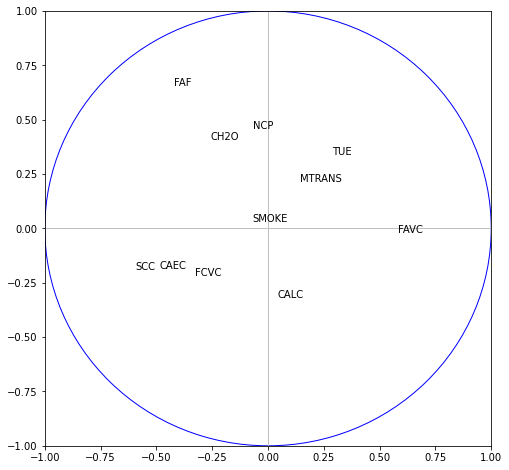

In [65]:
# Reprensentation des Variables
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# Print the labels (variable names)
for j in range(q+p):
    plt.annotate(datacon.columns[j],(corvar2[j+2,0],corvar2[j+2,1]))

# Add the axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# Add a circle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
# Print the correlation circle
plt.show()

Text(0, 0.5, 'Second CCA Components')

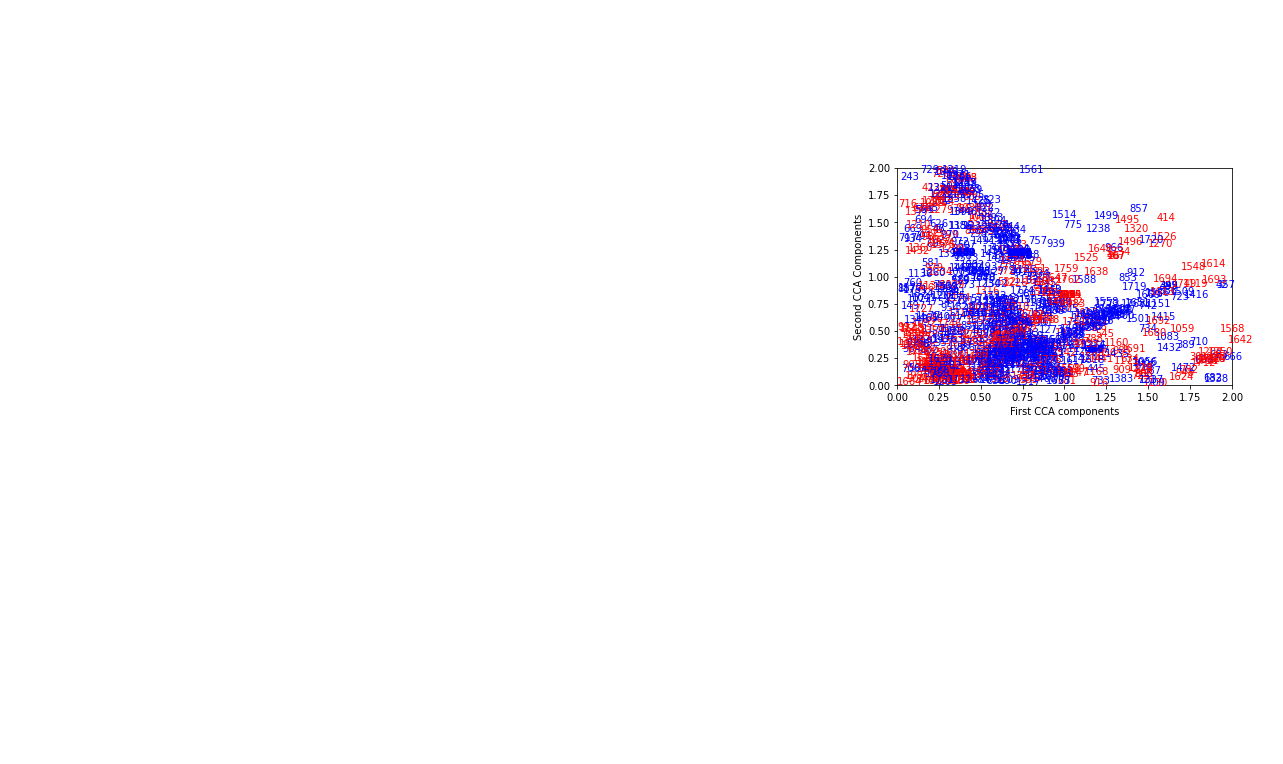

In [66]:
# Reprensentation des individus sur le plan
U1 = U_[:,0]#[:5]
V1 = V_[:,0]#[:5]
U2 = U_[:,1]#[:5]
V2 = V_[:,1]#[:5]

for i in range(len(V2)):
    plt.annotate(i, (U1[i],U2[i]), color="b")
    plt.annotate(i, (V1[i],V2[i]), color="r")
plt.xlim(0,2)
plt.ylim(0,2)
plt.xlabel('First CCA components')
plt.ylabel('Second CCA Components')
# plt.savefig("obs_visualization_pratical")